In [1]:
import wordcloud
import numpy as np
from matplotlib import pyplot as plt 
from IPython.display import display
import fileupload
import io
import sys

In [5]:
def _upload():
    _upload_widget = fileupload.FileUploadWidget()
    
    def _cb(change):
        global file_contents
        decoded = io.StringIO(change['owner'].data.decode('utf-8'))
        filename = change['owner'].filename
        print('uploaded {} ({:.2f} kB)'.format(filename, len(decoded.read())/2 **10))
        file_contents = decoded.getvalue()
        
    _upload_widget.observe(_cb, names = 'data')
    display(_upload_widget)
    
_upload()

FileUploadWidget(label='Browse', _dom_classes=('widget_item', 'btn-group'))

uploaded White sand missile range.txt (25.09 kB)


In [14]:
def calculate_frequencies(file_contents):
    punctuations = '''!()-[]:;'"\,<>./?@#$%^&*_~'''
    uninterested = ["the","your","yours","he","she","a","to","if","is","to","of","and","or","an","i","me","my"\
                   "we","our","ours","you","him","his","her","hers","its","they","them"\
                   "their", "what", "which", "who", "whom", "this", "that", "am", "are", "was", "were", "be", "been", "being", \
                   "have", "has", "had", "do", "does", "did", "but", "at", "by", "with", "from", "here", "when", "where", "how", \
                   "all", "any", "both", "each", "few", "more", "some", "such", "no", "nor", "too", "very", "can", "will", "just"\
                   "into","in","on","for","would","it","as","not","into","not"]
    frequency = {}
    
    dict1 = []
    d ={}
    for words in file_contents.split():
        if words.isalpha() and words.lower() not in uninterested :
            dict1.append(words.lower())
            
    for word in dict1 :
        if word not in d : 
            d[word] = 0
        d[word] += file_contents.split().count(word)
        
    #wordcloud
    cloud = wordcloud.WordCloud()
    cloud.generate_from_frequencies(d)
    return cloud.to_array()

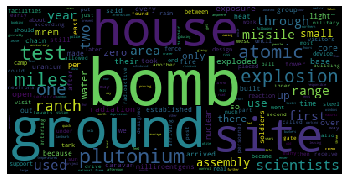

In [15]:
myimage = calculate_frequencies(file_contents)
plt.imshow(myimage, interpolation = 'nearest')
plt.axis('off')
plt.show()